In [176]:
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
dataset=pd.read_csv('BlackFriday.csv')

In [178]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [179]:
dataset.shape

(537577, 12)

In [180]:
dataset['Gender'].unique()

array(['F', 'M'], dtype=object)

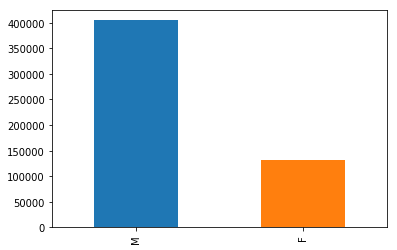

In [181]:
dataset['Gender'].value_counts().plot.bar()

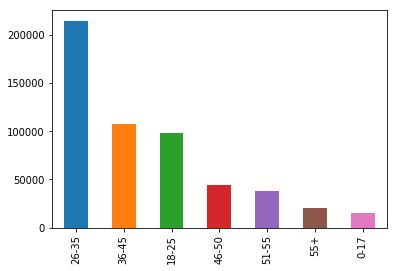

In [182]:
dataset['Age'].value_counts().sort_values(ascending=False).plot.bar()

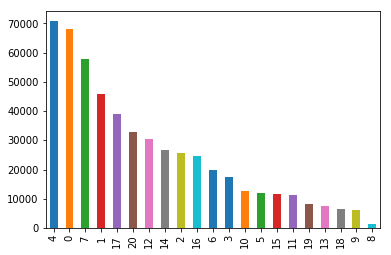

In [183]:
dataset['Occupation'].value_counts().plot.bar()

In [184]:
total_occ=len(dataset)
occ_df = pd.Series(dataset['Occupation'].value_counts() / total_occ).reset_index()
occ_df.columns = ['Occupation', 'Occupation_percent']
occ_df

,Occupation,Occupation_percent
0,4,0.131817
1,0,0.126717
2,7,0.107531
3,1,0.085515
4,17,0.072715
5,20,0.061219
6,12,0.056593
7,14,0.049690
8,2,0.048077
9,16,0.046114


In [185]:
dataset.groupby(['Occupation'])['Purchase'].mean().reset_index()

,Occupation,Purchase
0,0,9186.946726
1,1,9017.703095
2,2,9025.938982
3,3,9238.077277
4,4,9279.026742
5,5,9388.848978
6,6,9336.378620
7,7,9502.175276
8,8,9576.508530
9,9,8714.335934


In [186]:
occ_df = occ_df.merge(
    dataset.groupby(['Occupation'])['Purchase'].mean().reset_index(), on='Occupation', how='left')

occ_df

,Occupation,Occupation_percent,Purchase
0,4,0.131817,9279.026742
1,0,0.126717,9186.946726
2,7,0.107531,9502.175276
3,1,0.085515,9017.703095
4,17,0.072715,9906.378997
5,20,0.061219,8881.099514
6,12,0.056593,9883.052460
7,14,0.049690,9568.536426
8,2,0.048077,9025.938982
9,16,0.046114,9457.133118


Text(0, 0.5, 'Seconds')

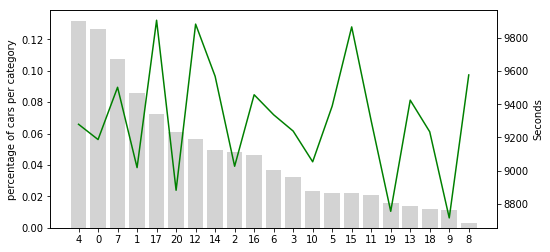

In [187]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.xticks(occ_df.index, occ_df['Occupation'], rotation=0)

ax2 = ax.twinx()
ax.bar(occ_df.index, occ_df["Occupation_percent"], color='lightgrey')
ax2.plot(occ_df.index, occ_df["Purchase"], color='green', label='Seconds')
ax.set_ylabel('percentage of cars per category')
ax2.set_ylabel('Seconds')

In [188]:
occ_df = pd.Series(dataset['Occupation'].value_counts() / total_occ)
occ_df.sort_values(ascending=False)
occ_df




occ_df[occ_df>=0.05].index

Int64Index([4, 0, 7, 1, 17, 20, 12], dtype='int64')

In [189]:
grouping_dict={
    k:('rare' if k not in occ_df[occ_df>=0.05].index else k)
    for k in occ_df.index
}

grouping_dict

{4: 4,
 0: 0,
 7: 7,
 1: 1,
 17: 17,
 20: 20,
 12: 12,
 14: 'rare',
 2: 'rare',
 16: 'rare',
 6: 'rare',
 3: 'rare',
 10: 'rare',
 5: 'rare',
 15: 'rare',
 11: 'rare',
 19: 'rare',
 13: 'rare',
 18: 'rare',
 9: 'rare',
 8: 'rare'}

In [190]:
dataset['Occupation_grouped']=dataset['Occupation'].map(grouping_dict)

dataset[['Occupation','Occupation_grouped']].head(30)
                                                 

,Occupation,Occupation_grouped
0,10,rare
1,10,rare
2,10,rare
3,10,rare
4,16,rare
5,15,rare
6,7,7
7,7,7
8,7,7
9,20,20


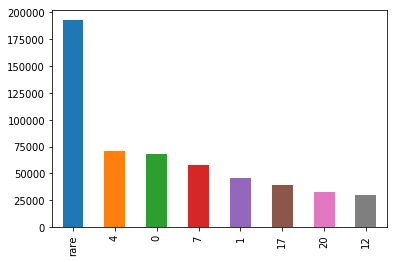

In [191]:
dataset['Occupation_grouped'].value_counts().plot.bar()

In [192]:
dataset['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

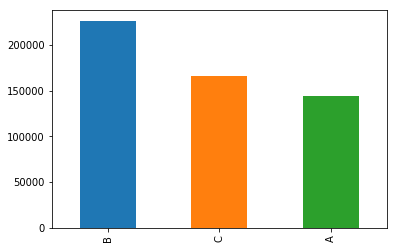

In [193]:
dataset['City_Category'].value_counts().plot.bar()

In [194]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_grouped
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,rare
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,rare
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,rare
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,rare
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,rare


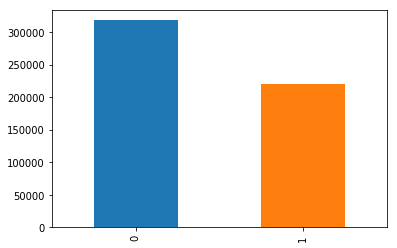

In [195]:
dataset.Marital_Status.value_counts().plot.bar()

In [196]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()




In [197]:
dataset['Gender']=label.fit_transform(dataset['Gender'])
dataset['Age']=label.fit_transform(dataset['Age'])

dataset['Marital_Status']=label.fit_transform(dataset['Marital_Status'])
dataset['City_Category']=label.fit_transform(dataset['City_Category'])


In [198]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_grouped
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370,rare
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,rare
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422,rare
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057,rare
4,1000002,P00285442,1,6,16,2,4+,0,8,NaN,NaN,7969,rare


In [199]:
dataset.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

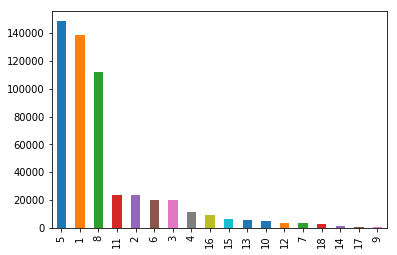

In [200]:
dataset.Product_Category_1.value_counts().plot.bar()

In [201]:
total_pdt=len(dataset)
pdt_df = pd.Series(dataset['Product_Category_1'].value_counts() / total_pdt).reset_index()
pdt_df.columns = ['Product_Category_1', 'Product_Category_1_precentage']
pdt_df

,Product_Category_1,Product_Category_1_precentage
0,5,0.276411
1,1,0.257364
2,8,0.208588
3,11,0.044570
4,2,0.043713
5,6,0.037509
6,3,0.036923
7,4,0.021517
8,16,0.018038
9,15,0.011539


In [202]:
pdt_df = pdt_df.merge(
    dataset.groupby(['Product_Category_1'])['Purchase'].mean().reset_index(), on='Product_Category_1', how='left')

pdt_df

,Product_Category_1,Product_Category_1_precentage,Purchase
0,5,0.276411,6238.004045
1,1,0.257364,13607.701495
2,8,0.208588,7497.354850
3,11,0.044570,4682.933556
4,2,0.043713,11255.680752
5,6,0.037509,15837.893573
6,3,0.036923,10096.841705
7,4,0.021517,2328.862886
8,16,0.018038,14764.157471
9,15,0.011539,14776.422215


Text(0, 0.5, 'Seconds')

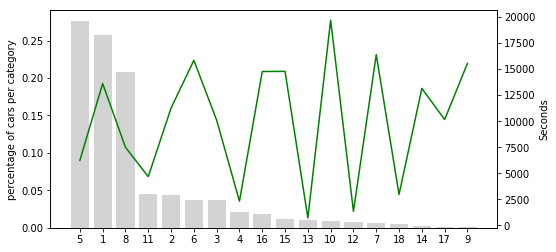

In [203]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.xticks(pdt_df.index, pdt_df['Product_Category_1'], rotation=0)

ax2 = ax.twinx()
ax.bar(pdt_df.index, pdt_df["Product_Category_1_precentage"], color='lightgrey')
ax2.plot(pdt_df.index, pdt_df["Purchase"], color='green', label='Seconds')
ax.set_ylabel('percentage of cars per category')
ax2.set_ylabel('Seconds')

In [204]:
pdt_df = pd.Series(dataset['Product_Category_1'].value_counts() / total_occ)
pdt_df.sort_values(ascending=False)
pdt_df




pdt_df[pdt_df>=0.20].index

Int64Index([5, 1, 8], dtype='int64')

In [205]:
grouping_dict_pdt={
    k:('rare' if k not in pdt_df[pdt_df>=0.20].index else k)
    for k in pdt_df.index
}

grouping_dict_pdt

{5: 5,
 1: 1,
 8: 8,
 11: 'rare',
 2: 'rare',
 6: 'rare',
 3: 'rare',
 4: 'rare',
 16: 'rare',
 15: 'rare',
 13: 'rare',
 10: 'rare',
 12: 'rare',
 7: 'rare',
 18: 'rare',
 14: 'rare',
 17: 'rare',
 9: 'rare'}

In [206]:
dataset['Product_grouped_1']=dataset['Product_Category_1'].map(grouping_dict_pdt)

dataset[['Product_Category_1','Product_grouped_1']].head(30)

,Product_Category_1,Product_grouped_1
0,3,rare
1,1,1
2,12,rare
3,12,rare
4,8,8
5,1,1
6,1,1
7,1,1
8,1,1
9,8,8


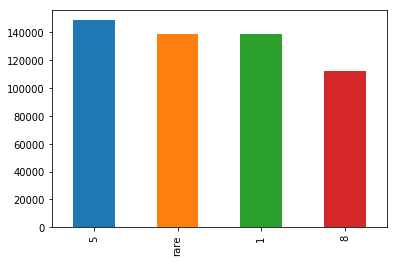

In [207]:
dataset.Product_grouped_1.value_counts().plot.bar()

In [208]:
dataset['Product_grouped_1']=dataset['Product_grouped_1'].astype(str)

In [209]:
dataset['Product_grouped_1']=label.fit_transform(dataset['Product_grouped_1'])

In [210]:
dataset.info()

dataset['Occupation_grouped']=dataset['Occupation_grouped'].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 14 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null int32
Age                           537577 non-null int32
Occupation                    537577 non-null int64
City_Category                 537577 non-null int32
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
Occupation_grouped            537577 non-null object
Product_grouped_1             537577 non-null int32
dtypes: float64(2), int32(4), int64(5), object(3)
memory usage: 49.2+ MB


In [211]:
dataset['Occupation_grouped']=label.fit_transform(dataset['Occupation_grouped'])

In [212]:
y=dataset.iloc[:,11:12]
y[0:5]

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969


In [213]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Occupation_grouped,Product_grouped_1
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370,7,3
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,7,0
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422,7,3
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057,7,3
4,1000002,P00285442,1,6,16,2,4+,0,8,NaN,NaN,7969,7,2


In [214]:
X=dataset.iloc[:,[2,3,5,7,12,13]]

In [215]:
X[0:5]

,Gender,Age,City_Category,Marital_Status,Occupation_grouped,Product_grouped_1
0,0,0,0,0,7,3
1,0,0,0,0,7,0
2,0,0,0,0,7,3
3,0,0,0,0,7,3
4,1,6,2,0,7,2


In [216]:
from sklearn.model_selection import train_test_split

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [226]:
from sklearn.tree import DecisionTreeRegressor

regressor=DecisionTreeRegressor()

regressor.fit(X_train,y_train)


y_pred=regressor.predict(X_train)
print('Random Forests mse: {}'.format(mean_squared_error(y_train, y_pred)))
print('Random Forests r2: {}'.format(r2_score(y_train, y_pred)))

y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Random Forests mse: {}'.format(mean_squared_error(y_test,y_pred)))
print('Random Forests r2: {}'.format(r2_score(y_test, y_pred)))

Random Forests mse: 16159339.322943404
Random Forests r2: 0.3490727711092
Random Forests mse: 16278492.975922521
Random Forests r2: 0.34330686509746855


In [227]:

regressor=AdaBoostRegressor(n_estimators=400, random_state=44)

regressor.fit(X_train,y_train)


y_pred=regressor.predict(X_train)
print('Random Forests mse: {}'.format(mean_squared_error(y_train, y_pred)))
print('Random Forests r2: {}'.format(r2_score(y_train, y_pred)))

y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Random Forests mse: {}'.format(mean_squared_error(y_test,y_pred)))
print('Random Forests r2: {}'.format(r2_score(y_test, y_pred)))

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forests mse: 16732374.977251967
Random Forests r2: 0.3259898651153208
Random Forests mse: 16619950.954893926
Random Forests r2: 0.329532057381553


In [228]:

regressor=RandomForestRegressor(n_estimators=300,
                           max_depth=4,
                           random_state=39)

regressor.fit(X_train,y_train)


y_pred=regressor.predict(X_train)
print('Random Forests mse: {}'.format(mean_squared_error(y_train, y_pred)))
print('Random Forests r2: {}'.format(r2_score(y_train, y_pred)))

y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Random Forests mse: {}'.format(mean_squared_error(y_test,y_pred)))
print('Random Forests r2: {}'.format(r2_score(y_test, y_pred)))

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forests mse: 16599269.708046218
Random Forests r2: 0.3313515845707595
Random Forests mse: 16498022.157259393
Random Forests r2: 0.33445080535607064
